In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('marketing_data.csv')
df

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
1,6,329.08,1,1,Rural,1,Web,No Offer,0
2,7,180.65,0,1,Surburban,1,Web,Buy One Get One,0
3,9,675.83,1,0,Rural,1,Web,Discount,0
4,2,45.34,1,0,Urban,0,Web,Buy One Get One,0
...,...,...,...,...,...,...,...,...,...
63995,10,105.54,1,0,Urban,0,Web,Discount,0
63996,5,38.91,0,1,Urban,1,Phone,Discount,0
63997,6,29.99,1,0,Urban,1,Phone,Discount,0
63998,1,552.94,1,0,Surburban,1,Multichannel,Buy One Get One,0


### Data exploration and cleaning

In [3]:
df.head()

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
1,6,329.08,1,1,Rural,1,Web,No Offer,0
2,7,180.65,0,1,Surburban,1,Web,Buy One Get One,0
3,9,675.83,1,0,Rural,1,Web,Discount,0
4,2,45.34,1,0,Urban,0,Web,Buy One Get One,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   recency        64000 non-null  int64  
 1   history        64000 non-null  float64
 2   used_discount  64000 non-null  int64  
 3   used_bogo      64000 non-null  int64  
 4   zip_code       64000 non-null  object 
 5   is_referral    64000 non-null  int64  
 6   channel        64000 non-null  object 
 7   offer          64000 non-null  object 
 8   conversion     64000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 4.4+ MB


In [5]:
df.describe()

,recency,history,used_discount,used_bogo,is_referral,conversion
count,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000
mean,5.763734,242.085656,0.551031,0.549719,0.502250,0.146781
std,3.507592,256.158608,0.497393,0.497526,0.499999,0.353890
min,1.000000,29.990000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,64.660000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,158.110000,1.000000,1.000000,1.000000,0.000000
75%,9.000000,325.657500,1.000000,1.000000,1.000000,0.000000
max,12.000000,3345.930000,1.000000,1.000000,1.000000,1.000000


In [6]:
df['conversion'].value_counts()

conversion
0    54606
1     9394
Name: count, dtype: int64

In [7]:
df['used_discount'].value_counts()

used_discount
1    35266
0    28734
Name: count, dtype: int64

#### The details of zip_code

In [8]:
df['zip_code'].unique()

array(['Surburban', 'Rural', 'Urban'], dtype=object)

In [9]:
df['zip_code'].nunique()

3

In [10]:
df['zip_code'].value_counts()

zip_code
Surburban    28776
Urban        25661
Rural         9563
Name: count, dtype: int64

#### The details of offer items and their number

In [11]:
df['offer'].unique()

array(['Buy One Get One', 'No Offer', 'Discount'], dtype=object)

In [12]:
df['offer'].nunique()

3

In [13]:
df['offer'].value_counts()

offer
Buy One Get One    21387
Discount           21307
No Offer           21306
Name: count, dtype: int64

In [14]:
df['zip_code'].value_counts()

zip_code
Surburban    28776
Urban        25661
Rural         9563
Name: count, dtype: int64

#### The details of channel items and their number

In [15]:
df['channel'].unique()

array(['Phone', 'Web', 'Multichannel'], dtype=object)

In [16]:
df['channel'].nunique()

3

In [17]:
df['channel'].value_counts()

channel
Web             28217
Phone           28021
Multichannel     7762
Name: count, dtype: int64

#### Check for nulls

In [18]:
df.isna().sum()

recency          0
history          0
used_discount    0
used_bogo        0
zip_code         0
is_referral      0
channel          0
offer            0
conversion       0
dtype: int64

#### Check for duplicates

In [19]:
df.duplicated().sum()

6603

#### Create a new data frame and delete duplicates

In [20]:
df_2=df.drop_duplicates()
df_2

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
1,6,329.08,1,1,Rural,1,Web,No Offer,0
2,7,180.65,0,1,Surburban,1,Web,Buy One Get One,0
3,9,675.83,1,0,Rural,1,Web,Discount,0
4,2,45.34,1,0,Urban,0,Web,Buy One Get One,0
...,...,...,...,...,...,...,...,...,...
63994,7,86.46,0,1,Urban,0,Web,Discount,0
63995,10,105.54,1,0,Urban,0,Web,Discount,0
63996,5,38.91,0,1,Urban,1,Phone,Discount,0
63998,1,552.94,1,0,Surburban,1,Multichannel,Buy One Get One,0


In [21]:
df_2.duplicated().sum()

0

In [22]:
df_2.sample(10)

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
6060,3,243.55,0,1,Rural,0,Phone,Buy One Get One,0
37349,5,33.60,1,0,Surburban,1,Phone,Buy One Get One,0
41214,1,631.24,1,1,Urban,1,Web,No Offer,0
39963,2,88.40,1,0,Urban,0,Phone,No Offer,0
7546,10,51.17,1,0,Rural,0,Phone,Buy One Get One,0
61816,4,123.87,1,0,Surburban,0,Phone,No Offer,0
5278,9,332.53,0,1,Surburban,1,Web,Discount,0
51868,1,299.60,0,1,Urban,0,Web,Buy One Get One,0
59921,4,225.68,0,1,Urban,0,Web,No Offer,0
42887,3,1704.92,0,1,Rural,1,Web,No Offer,0


### analysis part

In [23]:
df_2.head()

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
1,6,329.08,1,1,Rural,1,Web,No Offer,0
2,7,180.65,0,1,Surburban,1,Web,Buy One Get One,0
3,9,675.83,1,0,Rural,1,Web,Discount,0
4,2,45.34,1,0,Urban,0,Web,Buy One Get One,0


In [24]:
df_2[df['conversion']==1].groupby('zip_code').count()['conversion']

C:\Users\chira\AppData\Local\Temp\ipykernel_16280\736415863.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2[df['conversion']==1].groupby('zip_code').count()['conversion']


zip_code
Rural        1755
Surburban    3807
Urban        3399
Name: conversion, dtype: int64

C:\Users\chira\AppData\Local\Temp\ipykernel_16280\1009854815.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2[df['conversion']==1].groupby('zip_code').sum()['conversion'].plot.bar( color ='maroon')


Text(0.5, 1.0, 'Most conversion zip code')

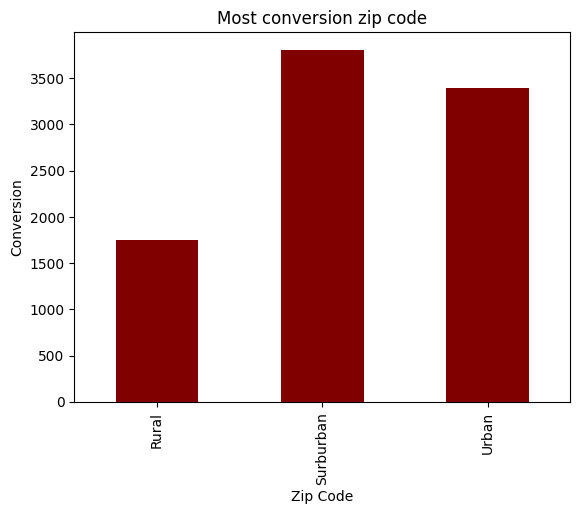

In [25]:
df_2[df['conversion']==1].groupby('zip_code').sum()['conversion'].plot.bar( color ='maroon')
plt.xlabel('Zip Code')
plt.ylabel('Conversion')
plt.title('Most conversion zip code')

In [26]:
df_2[df_2['used_discount']==1].count()['conversion']

31932

In [27]:
df_2[df_2['used_discount']==0].count()['conversion']

25465

In [28]:
df_2[['used_discount', 'conversion']].corr()

,used_discount,conversion
used_discount,1.000000,0.009534
conversion,0.009534,1.000000


In [29]:
df_3=df_2[['used_discount','conversion']].value_counts().reset_index(name='count')
df_3

,used_discount,conversion,count
0,1,0,26848
1,0,0,21588
2,1,1,5084
3,0,1,3877


In [30]:
df_3["used_discount"].replace(1,'yes', inplace=True)
df_3["used_discount"].replace(0,'no', inplace=True)
df_3["conversion"].replace(1,'yes', inplace=True)
df_3["conversion"].replace(0,'no', inplace=True)
df_3

,used_discount,conversion,count
0,yes,no,26848
1,no,no,21588
2,yes,yes,5084
3,no,yes,3877


In [31]:
df_4=df_2[['offer','conversion']].value_counts().reset_index(name='count')
df_4

,offer,conversion,count
0,No Offer,0,16883
1,Buy One Get One,0,16090
2,Discount,0,15463
3,Discount,1,3703
4,Buy One Get One,1,3069
5,No Offer,1,2189


<Axes: xlabel='offer', ylabel='count'>

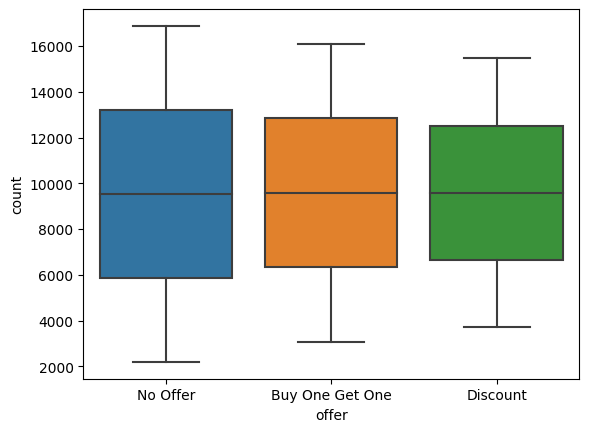

In [32]:
sns.boxplot(x="offer", y="count", data=df_4)

Text(0.5, 1.0, 'Most Converting Offers')

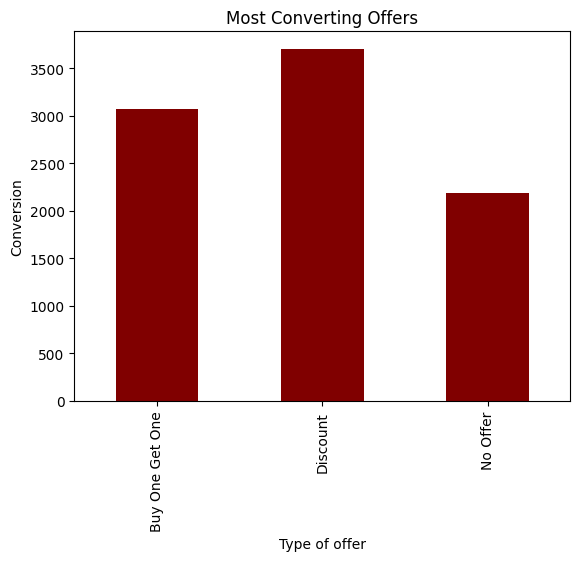

In [33]:
df_4[df_4['conversion']==1].groupby('offer').sum()['count'].plot.bar( color ='maroon')
plt.xlabel('Type of offer')
plt.ylabel('Conversion')
plt.title('Most Converting Offers')

In [34]:
df_2['channel'].value_counts().to_frame()

,count
channel,
Web,24887
Phone,24750
Multichannel,7760


In [35]:
df_new=df_2[['channel','conversion']].value_counts().reset_index(name='count')
df_new

,channel,conversion,count
0,Phone,0,21352
1,Web,0,20657
2,Multichannel,0,6427
3,Web,1,4230
4,Phone,1,3398
5,Multichannel,1,1333


In [36]:
df_new2=df_new.drop([0,1,2])
df_new2

,channel,conversion,count
3,Web,1,4230
4,Phone,1,3398
5,Multichannel,1,1333


Text(0.5, 1.0, 'Most Converted Channels')

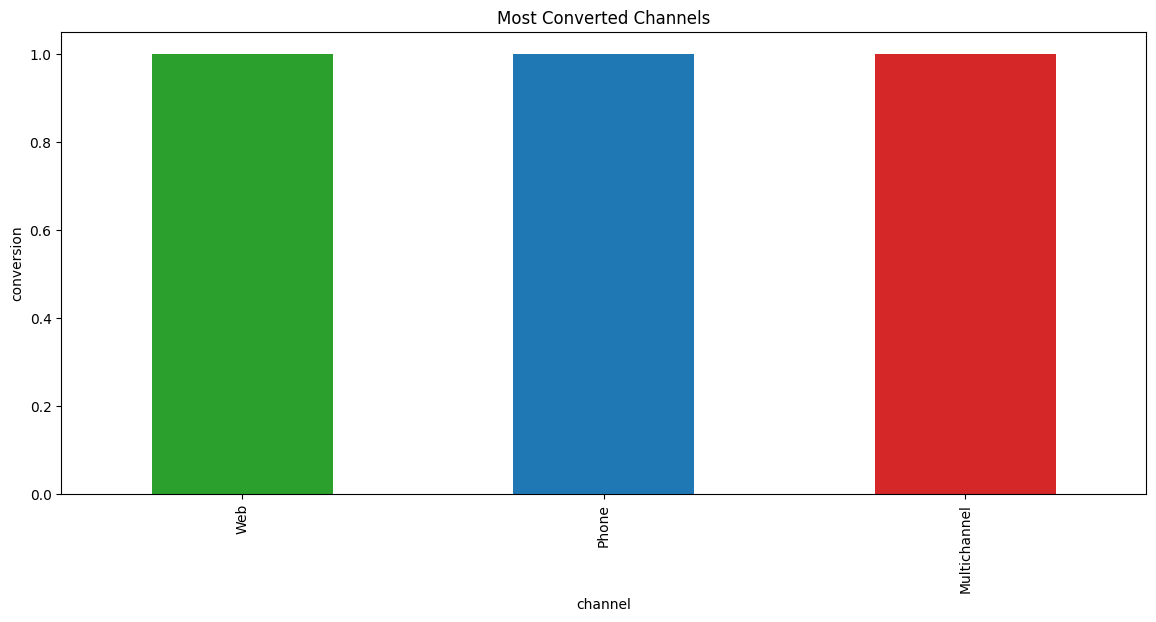

In [37]:
bar_colors = ['tab:green', 'tab:blue', 'tab:red']
ax = df_new2['channel'].value_counts().plot(kind='bar', figsize=(14,6), color=bar_colors)
ax.set_ylabel('conversion')
ax.set_xlabel('channel')
ax.set_title('Most Converted Channels')